<a href="https://colab.research.google.com/github/Ailudb31/TP-Final-Chona---CNN/blob/main/TP_Final_Redes_Neuronales_Convucionales_en_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*TP Final: Redes Neuronales Convucionales en Tensorflow*

Beltrán Cid, Ailén de Barbará y Tomás Schiavonne

4 TIC A

## Problemática
Probelmatica: Fashion MNIST es un dataset de imágenes de 28x28 píxeles en escala de grises, categorizadas en 10 clases diferentes de ropa y accesorios. El objetivo es clasificar estas imágenes en una de las categorías usando una red neuronal convolucional (CNN).

Solución propuesta: Implementaremos una CNN en Keras con TensorFlow, diseñada para aprender y clasificar estos diferentes tipos de prendas.

In [37]:
# Importamos todas las librerias necesarias
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import numpy as np
import seaborn as sns
!pip install keras-visualizer
from keras_visualizer import visualizer
from IPython.display import Image

In [38]:
# Cargamos el dataset de fashin mnist
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [39]:
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)

Forma de y_train: (60000,)
Forma de y_test: (10000,)


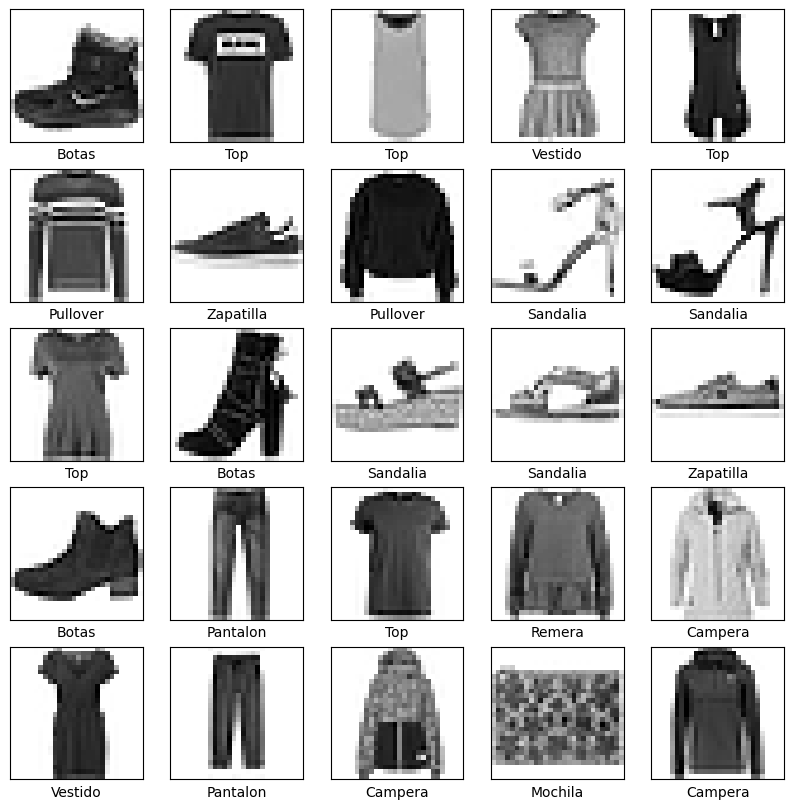

In [40]:
# Mostramos ejemplos de las imagenes con sus respectivas clases (entrada)
class_names = ["Top", "Pantalon", "Pullover", "Vestido", "Campera",
               "Sandalia", "Remera", "Zapatilla", "Mochila", "Botas"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [41]:
# Creamos el modelo de CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7373 - loss: 0.7087 - val_accuracy: 0.8620 - val_loss: 0.3854
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8780 - loss: 0.3337 - val_accuracy: 0.8810 - val_loss: 0.3333
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8933 - loss: 0.2890 - val_accuracy: 0.8877 - val_loss: 0.3093
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9084 - loss: 0.2450 - val_accuracy: 0.8997 - val_loss: 0.2724
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 28ms/step - accuracy: 0.9184 - loss: 0.2256 - val_accuracy: 0.8946 - val_loss: 0.2794
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9237 - loss: 0.2067 - val_accuracy: 0.9026 - val_loss: 0.2713
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 29ms/step - accuracy: 0.9325 - loss: 0.1806 - val_accuracy: 0.9050 - val_loss: 0.2650
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 53s 28ms/step - accuracy: 0.9358 -

In [44]:
history.history

{'accuracy': [0.8118166923522949,
  0.8800666928291321,
  0.8961833119392395,
  0.9078666567802429,
  0.9181166887283325,
  0.9244499802589417,
  0.9305166602134705,
  0.9352333545684814,
  0.941266655921936,
  0.9446166753768921],
 'loss': [0.5082293152809143,
  0.3273974657058716,
  0.28241604566574097,
  0.24800290167331696,
  0.2251857966184616,
  0.20528718829154968,
  0.18664805591106415,
  0.1725473254919052,
  0.15715746581554413,
  0.14439980685710907],
 'val_accuracy': [0.8619999885559082,
  0.8809999823570251,
  0.8877000212669373,
  0.8996999859809875,
  0.894599974155426,
  0.9025999903678894,
  0.9049999713897705,
  0.9027000069618225,
  0.9082000255584717,
  0.907800018787384],
 'val_loss': [0.38537436723709106,
  0.3332942724227905,
  0.30931806564331055,
  0.2723507285118103,
  0.27944090962409973,
  0.2713180482387543,
  0.2650245726108551,
  0.2723841667175293,
  0.26608020067214966,
  0.2732691168785095]}

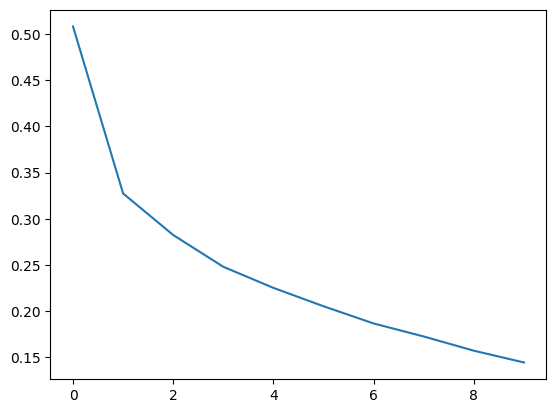

In [45]:
plt.plot(history.history['loss'])

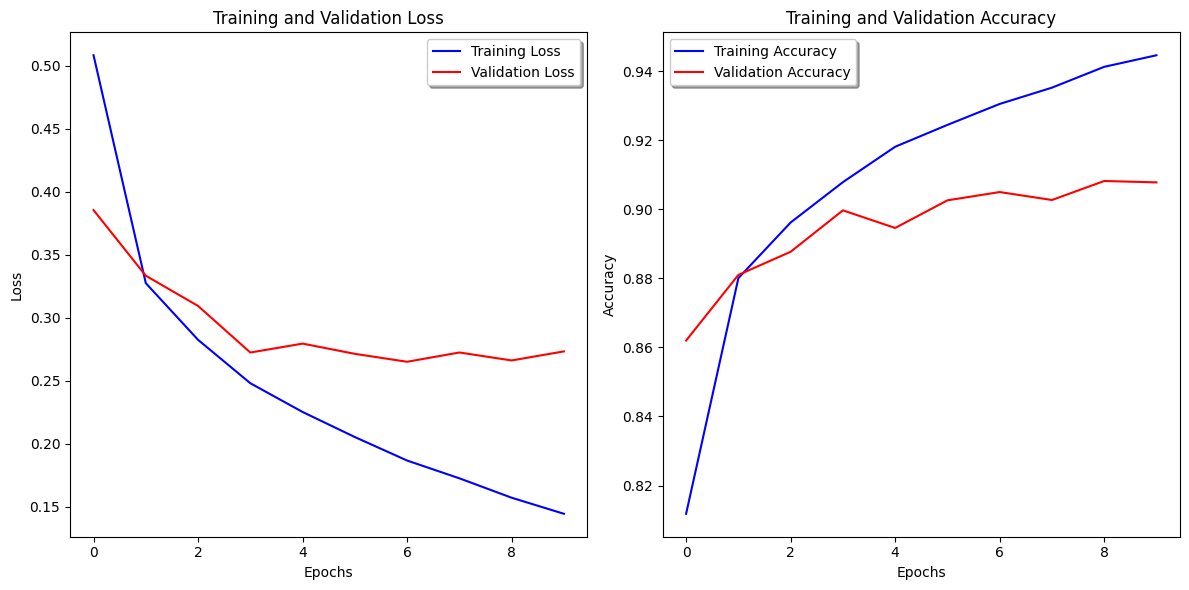

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Pérdida de entrenamiento y validación
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss")
ax[0].set_title('Training and Validation Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(loc='best', shadow=True)

# Precisión de entrenamiento y validación
ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
ax[1].set_title('Training and Validation Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(loc='best', shadow=True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9034 - loss: 0.2847
Test accuracy: 0.907800018787384
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


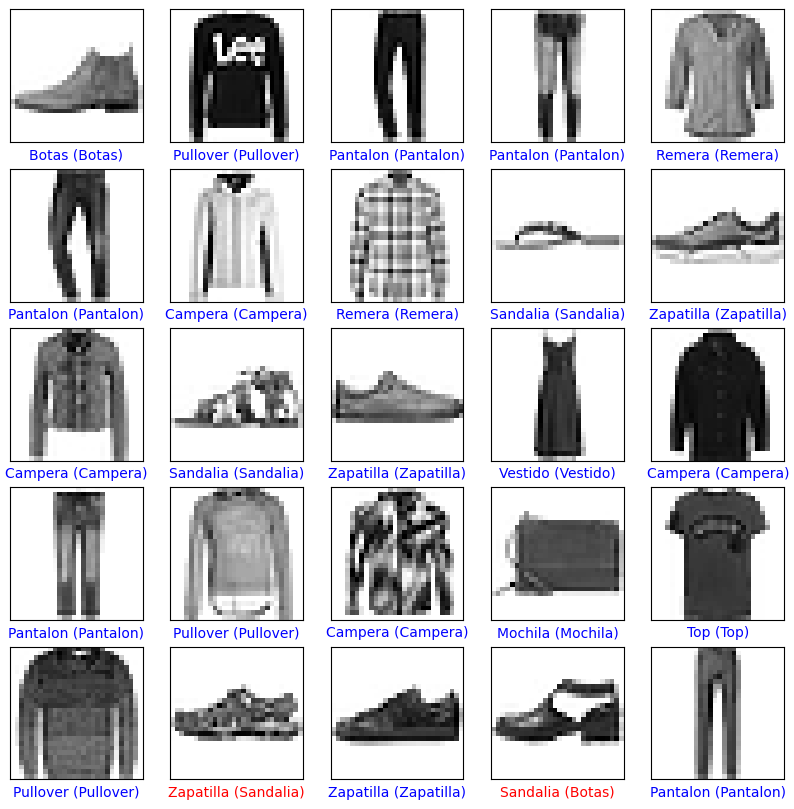

In [47]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

predictions = model.predict(x_test)

# Visualización de algunas predicciones (salida)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[y_test[i]]
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({true_label})", color=color)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


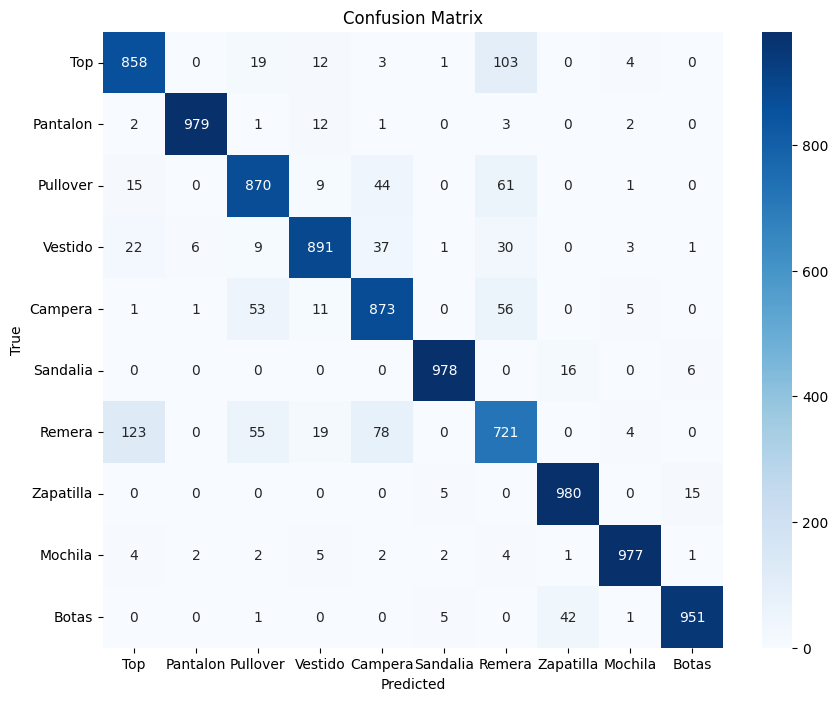

In [48]:
# Obtener las predicciones del modelo
Y_pred = model.predict(x_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = y_test
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [49]:
# Utilizamos keras-visualizer
visualizer(model, view=False, file_name='/content/model.png')

# Mostrar la imagen en Google Colab
image_path = '/content/model.png'
Image(filename=image_path)

# No se porque no permite visualizar la imagen

In [50]:
# Guardar el modelo entrenado
model.save('/content/fashion_mnist_model.keras')

## Explicación, justificación y desarrollo del trabajo
Este dataset contiene imágenes en escala de grises de 28x28 píxeles, que se clasifican en 10 categorias de ropa. Se puso como objetivo entrenar un modelo que pueda predecir correctamente la categoría de cada imagen.

El modelo propuesto consta de dos capas convolucionales seguidas de capas de pooling, que se encargan de extraer y reducir las características de las imágenes. Después, la salida se aplanará y pasará por una capa densa que realiza la clasificación final. La red utiliza la función de activación ReLU en las capas ocultas y softmax en la capa de salida, que asigna probabilidades a las 10 categorías.

El modelo se entrena utilizando el optimizador Adam y la función de pérdida categorical crossentropy, adecuada para tareas de clasificación multiclase. Durante el entrenamiento, se evalúa el rendimiento del modelo tanto en el conjunto de entrenamiento como en el conjunto de prueba.

Se visualiza la arquitectura del modelo mediante keras visualizer, como sugerido por el profesor (no se porque no funciona). Se visualizan los resultados de entrenamiento, incluyendo la precisión y la pérdida tanto en el conjunto de entrenamiento como en el de validación.